# 图像计算

## 1.图像相加

In [1]:
import numpy as np
import cupy as cp
import scipy as sp
import skimage as ski
import skimage.io as skio
import skimage.color as skc
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
src1 = skio.imread('../../datas/f2.jpg')
src2 = skio.imread('../../datas/f1.jpg')

In [3]:
def image_add(src1,src2):
    assert src1.shape == src2.shape
    src_gpu1 = cp.array(src1.astype(np.float32))
    src_gpu2 = cp.array(src2.astype(np.float32))
    dst_gpu = src_gpu1 + src_gpu2
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [4]:
dst = image_add(src1,src2)

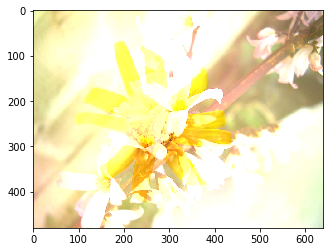

In [5]:
plt.imshow(dst)

In [6]:
def image_add_weighted(src1,alpha,src2,beta):
    src_gpu1 = cp.array(src1.astype(np.float32))
    src_gpu2 = cp.array(src2.astype(np.float32))
    dst_gpu = src_gpu1 * alpha + src_gpu2 * beta
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [7]:
dst = image_add_weighted(src1,0.5,src2,0.5)

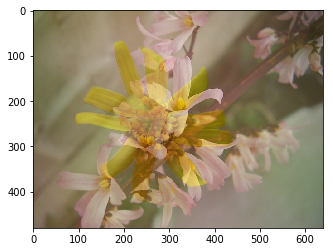

In [8]:
plt.imshow(dst)

## 2.图像相减

In [9]:
def image_sub(src1,src2):
    assert src1.shape == src2.shape
    src_gpu1 = cp.array(src1.astype(np.float32))
    src_gpu2 = cp.array(src2.astype(np.float32))
    dst_gpu = src_gpu1 - src_gpu2
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [10]:
dst = image_sub(src1,src2)

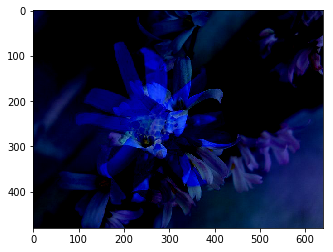

In [11]:
plt.imshow(dst)

## 3.图像相乘

### 3.1多通道与单通道图像相乘

In [12]:
def image_multiply_with_single_channel(src1,src2):
    assert len(src1.shape) > len(src2.shape)
    assert src1.shape[:2] == src2.shape
    src_gpu1 = cp.array(src1.astype(np.float64))
    src_gpu2 = cp.array(src2.astype(np.float64))
    chs = src1.shape[2]
    dst_gpu = cp.zeros_like(src_gpu1)
    for i in range(chs):
        dst_gpu[:,:,i] = src_gpu1[:,:,i] * src_gpu2
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [13]:
gray = skc.rgb2gray(src1)
gray = ski.img_as_ubyte(gray)
mask = np.zeros_like(gray)
idx = gray >= 160
mask[idx] = 1
dst = image_multiply_with_single_channel(src1,mask)

C:\Users\jenson\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


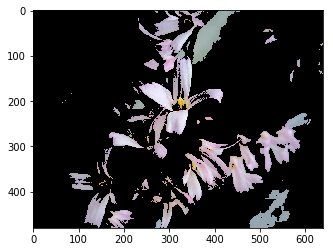

In [14]:
plt.imshow(dst)

### 3.2 多通道图像与多通道图像相乘

In [15]:
def image_multiply_multi_channel(src1,src2):
    assert src1.shape == src2.shape
    src_gpu1 = cp.array(src1.astype(np.float64))
    src_gpu2 = cp.array(src2.astype(np.float64))
    chs = src1.shape[2]
    dst_gpu = cp.zeros_like(src_gpu1)
    dst_gpu = src_gpu1 * src_gpu2
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [16]:
dst = image_multiply_multi_channel(src1,src2)

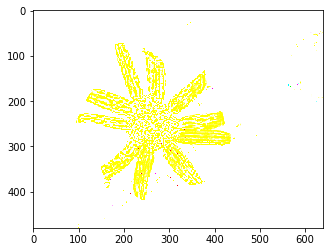

In [17]:
plt.imshow(dst)

## 4.图像相除

In [18]:
def image_div(src1,src2):
    assert src1.shape == src2.shape
    src_gpu1 = cp.array(src1.astype(np.float64))
    src_gpu2 = cp.array(src2.astype(np.float64))
    eps = 1e-5
    dst_gpu = src_gpu1 * cp.abs(src_gpu1 - src_gpu2) / (src_gpu1 + src_gpu2 + eps)
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [19]:
dst = image_div(src1,src2)

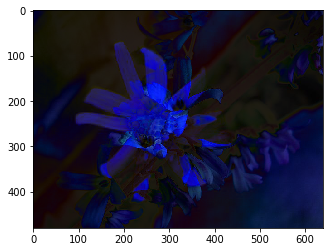

In [20]:
plt.imshow(dst)

## 5.图像位运算

In [24]:
def image_or(src1,src2):
    src_gpu1 = cp.array(src1.astype(np.int32))
    src_gpu2 = cp.array(src2.astype(np.int32))
    dst_gpu = cp.bitwise_or(src_gpu1,src_gpu2)
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

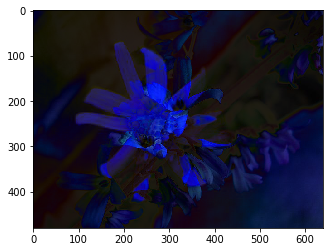

In [25]:
plt.imshow(dst)

In [26]:
def image_and(src1,src2):
    src_gpu1 = cp.array(src1.astype(np.int32))
    src_gpu2 = cp.array(src2.astype(np.int32))
    dst_gpu = cp.bitwise_and(src_gpu1,src_gpu2)
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [27]:
dst = image_and(src1,src2)

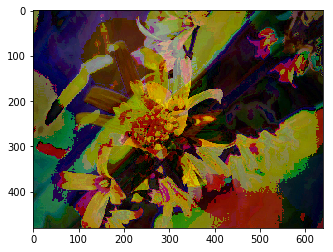

In [28]:
plt.imshow(dst)

In [29]:
def image_xor(src1,src2):
    src_gpu1 = cp.array(src1.astype(np.int32))
    src_gpu2 = cp.array(src2.astype(np.int32))
    dst_gpu = cp.bitwise_xor(src_gpu1,src_gpu2)
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [31]:
dst = image_xor(src1,src2)

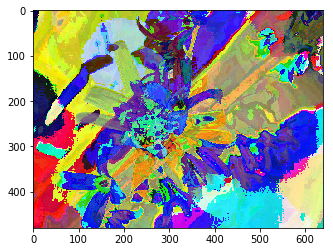

In [32]:
plt.imshow(dst)